# Ejercicio de programación Regresión Lineal

In [20]:
# utilizado para manejos de directorios y rutas
#Estudiante: Valda Plaza Camila Monserrat
#Carrera: Ing. Sistemas
import os
import pandas as pd  # importar pandas
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df = pd.read_csv('/content/drive/MyDrive/Lab1-Monsie/housing.csv')

# Verificar si hay valores nulos o vacíos
print("Valores faltantes antes del preprocesamiento:")
print(df.isnull().sum())

# Reemplazar los valores nulos o vacíos con la media de las columnas numéricas
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)

print("\nValores faltantes después del preprocesamiento:")
print(df.isnull().sum())

# Usando nombres de columnas
X = df['sqft_living'].values
y = df['price'].values

m = y.size

# Mostrar el DataFrame después del preprocesamiento
print("\nDataFrame después del preprocesamiento:")
display(df)

Valores faltantes antes del preprocesamiento:
Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

Valores faltantes después del preprocesamiento:
Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

DataFrame después de

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [23]:
print(X)

[1180 2570  770 ... 1020 1600 1020]


In [24]:
print(X)

[1180 2570  770 ... 1020 1600 1020]


In [25]:
print(y)

[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [26]:
print(X.size)

21613


### 1.1 Trazar los datos

In [27]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Precio')
    pyplot.xlabel('Metros cuadrados habitables')

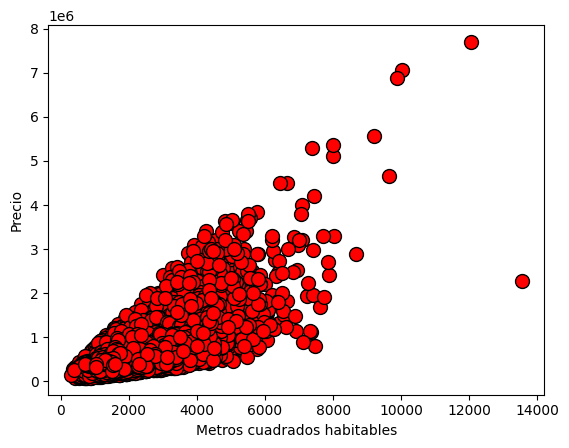

In [28]:
plotData(X, y)

In [29]:
# ?pyplot.plot

In [30]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

In [31]:
print(X)

[[1.00e+00 1.18e+03]
 [1.00e+00 2.57e+03]
 [1.00e+00 7.70e+02]
 ...
 [1.00e+00 1.02e+03]
 [1.00e+00 1.60e+03]
 [1.00e+00 1.02e+03]]


<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [32]:
def calcularCosto(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [33]:
J = calcularCosto(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
# print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = calcularCosto(X, y, theta=np.array([0.5, 0.5]))
print('Con theta = [0.5, 0.5]\n Costo calculado = %.2f' % J)
# print('Valor de costo esperado (aproximadamente)  54.24')

J = calcularCosto(X, y, theta=np.array([0.6, 0.6]))
print('Con theta = [0.6, 0.6]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.7, 0.7]))
print('Con theta = [0.7, 0.7]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.8, 0.8]))
print('Con theta = [0.8, 0.8]\n Costo calculado = %.2f' % J)

J = calcularCosto(X, y, theta=np.array([0.75, 0.75]))
print('Con theta = [0.75, 0.75]\n Costo calculado = %.2f' % J)

Con theta = [0, 0] 
 Costo calculado = 213235671551.20
Con theta = [0.5, 0.5]
 Costo calculado = 212556031380.69
Con theta = [0.6, 0.6]
 Costo calculado = 212420258555.73
Con theta = [0.7, 0.7]
 Costo calculado = 212284537467.17
Con theta = [0.8, 0.8]
 Costo calculado = 212148868114.98
Con theta = [0.75, 0.75]
 Costo calculado = 212216696324.03


In [34]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(calcularCosto(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [35]:

# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 10000
alpha = 0.0000001

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')
print(J_history)

Theta encontrada por descenso gradiente: -7.0046, 263.0920
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]
[np.float64(76076196543.06691), np.float64(44071488435.0893), np.float64(36603529393.80692), np.float64(34860960389.6081), np.float64(34454350398.87241), np.float64(34359472268.16606), np.float64(34337333459.23382), np.float64(34332167599.206024), np.float64(34330962196.70636), np.float64(34330680924.94677), np.float64(34330615289.289494), np.float64(34330599970.028595), np.float64(34330596391.564884), np.float64(34330595552.691616), np.float64(34330595353.072712), np.float64(34330595302.617027), np.float64(34330595286.967003), np.float64(34330595279.4385), np.float64(34330595273.805073), np.float64(34330595268.613846), np.float64(34330595263.5258), np.float64(34330595258.46183), np.float64(34330595253.403477), np.float64(34330595248.346424), np.float64(34330595243.28969), np.float64(34330595238.23303), np.float64(34330595233.176376), np.float64(34330595228.11974), np

Se utilizan los parametros finales para grafical la linea.

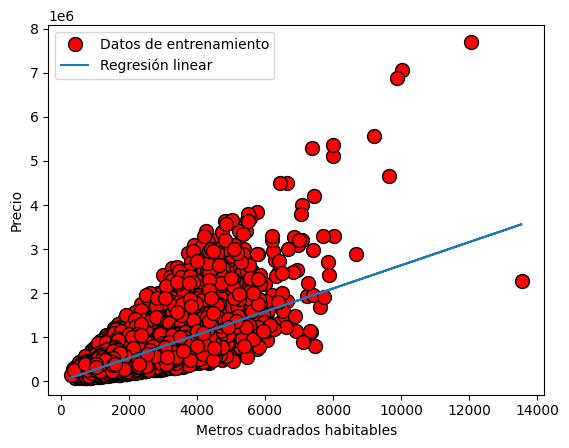

In [36]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [37]:
# Predecir precio para casas de 2000 y 3000 sqft_living
predict1 = np.dot([1, 2000], theta)
print('Para una casa de 2000 sqft, se predice un precio de {:.2f}\n'.format(predict1))

predict2 = np.dot([1, 3000], theta)
print('Para una casa de 3000 sqft, se predice un precio de {:.2f}\n'.format(predict2))

Para una casa de 2000 sqft, se predice un precio de 526177.01

Para una casa de 3000 sqft, se predice un precio de 789269.02



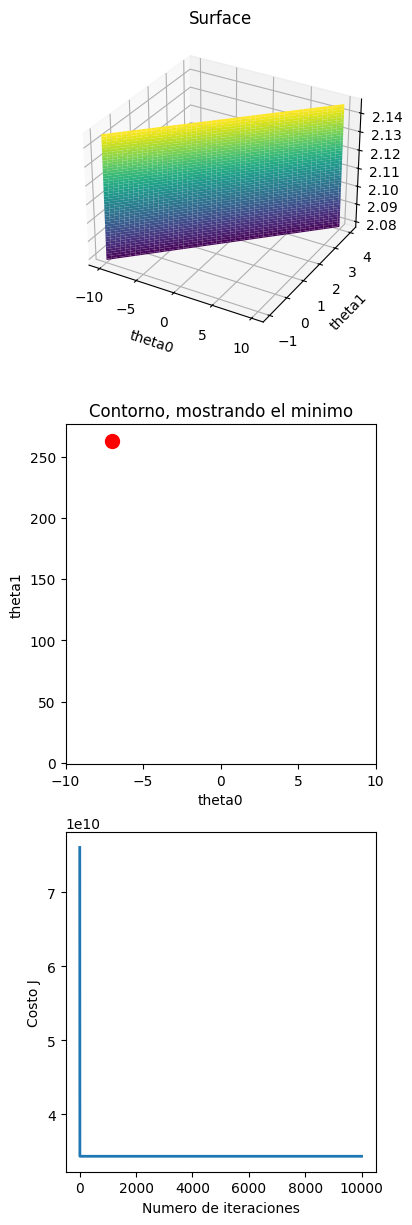

In [38]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = calcularCosto(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass